**First** : Let me Put You on the Road.

If you are using Google Colab please Execute the following Code in next Cell  , so you will give the Permission for Google Colab to Access your folders in Google Drive 

***DO NOT RUN IT IF YOU ARE ON JUPYTER ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/My Drive/Colab Notebooks')

**Second**  Let's Install Our Dependencies 
`xlrd` is used for  Reading Excel Files 


In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Third** : Let's Now Import the Packages that we are going to use 

In [ ]:
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc 
import xlrd  # For Excel Files
import os   # For Changing to the Correct Directory 
from math import sqrt
from random import seed
from random import randrange

**Forth** :  Type a Code to Read  The Excel File 
hint go and use `pd.read_excel`

In [ ]:
df= pd.read_excel('data.xlsx')
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


So this Data is about:-

Auto Insurance in Sweden
In the following data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance



**Fifth** Type a Code  that Change the Features and Labels  from pandas frame into Numpy Arrays.

*40 rows only* for **Training** and the Rest for **Testing**
hint : use `df.iloc` ,`.values` 

In [ ]:
X_train= df.iloc[:40,0].values 
y_train= df.iloc[:40,1].values
X_test= df.iloc[40:,0].values
y_test= df.iloc[40:,1].values

**Sixth** Check the Type and Size of the Arrays you created by Printing them.
hint Go and use :  `shape` , `type` 

In [ ]:
print('The Features to be trained on :', np.shape(X_train) )
print('The Labels to be trained on :', np.shape(y_train) )
print('The Features to be tested on :', np.shape(X_test) )
print('The Labels to be tested on :', np.shape(y_test) )
print('X_train type : ', type(X_train), 'X_test type :',type(X_test) ,'y_train type :', type(y_train) , 'y_test type :', type(y_test) )

The Features to be trained on : (40,)
The Labels to be trained on : (40,)
The Features to be tested on : (23,)
The Labels to be tested on : (23,)
X_train type :  <class 'numpy.ndarray'> X_test type : <class 'numpy.ndarray'> y_train type : <class 'numpy.ndarray'> y_test type : <class 'numpy.ndarray'>


**Seventh** Let me do this for you  but watch me properly, its for Visualization.

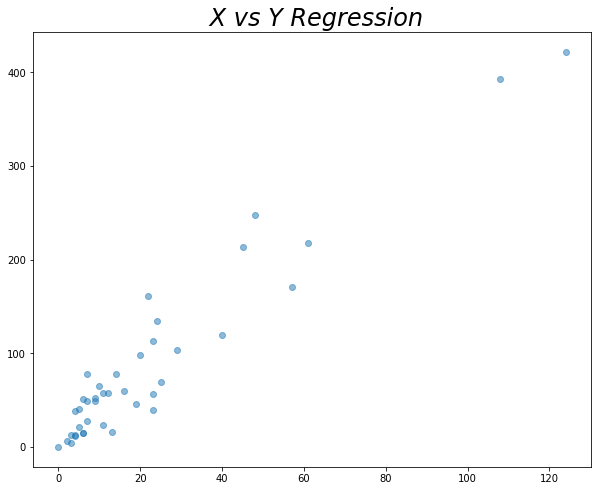

In [ ]:
import matplotlib.pyplot as plt # A Great Package For Plotting and Visualization 
plt.figure(figsize=(10,8))     # The Plotting Window Size 
plt.title(' X vs Y Regression', fontsize=24 , fontstyle='italic')  # Title , Font size and Style 
plt.scatter(X_train ,y_train , alpha =0.5 ,label='Y')  # NOTE : Make Sure  x_train , y_train  IN Data Type ( Array )
plt.show()   # Showing the Result of plotting 

Hungry for Statistics ?
Okey Let's Go for it, But Do you even remember the Expressions?

**Eighth** ? I don't know how to type this  but i meant 8th
Okey, Whatever Just Go and build a Function Mean Squared Error and call it `MSE()` That Takes a List of Actual Values and List of Predicted Values  then Returning the Mean Squared Error between them 


In [ ]:
def MSE(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)


**Ninth** Build  Following Functions:

1- `Mean()`  its input :  Values ,  its Ouput : Mean of the Values.

2- `Variance()` its input : Values, Mean , its Output : Variance of the Values.

3- `Covariance()` its input : Values of X, X_mean , y_mean ,y, its Output : Covariance of X and Y.



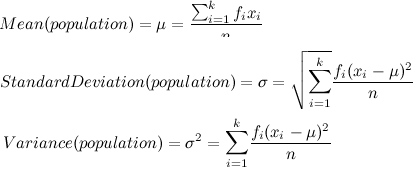

In [ ]:
# Calculate the mean value of a list of numbers
def mean (values):
  return (sum(values) / float(len(values)))


# Calculate the variance of a list of numbers

def variance(values ,mean):

  return sum([(x-mean)**2 for x in values])


# Calculate covariance between x and y

def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

**Tenth** : watch out for a Sensitive Point you now need to build a Function that will use  the Previous Functions to return the Co-efficents of the Best Fit Line  which  is Beta Zero and Beta One 

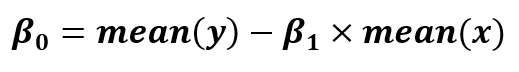


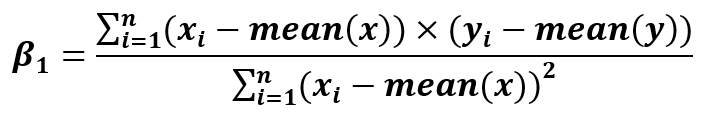

Alternate way for Beta One 


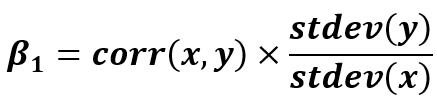

In [ ]:
# Calculate coefficients
def coefficients(df):
	x = [row[0] for row in df]
	y = [row[1] for row in df]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

**Eleventh**: Build a function  that will take the Input Training Data and Testing the Data , Then call the Co efficient Function with the Training Data to get the Co efficents then use it for Building the Best fit Line and return the Predictions of the Test set 


In [ ]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions


**Twelveth**: Finally Build a Function that Calls The `MSE` function and the `SimpleLineRegression` Function and use it to Print the Result as an Evaluation for the model

In [ ]:
# Split a dataset into a train and test set
def train_test_split(df, split):
	train = list()
	train_size = int(split * len(df))
	print(train_size)
	df_copy = list(df)
	print(df_copy)
	X = np.array(df[[X]] )
	Y = np.array(df[[Y]] )
	while len(train) < train_size:
		index = randrange(len(df_copy))
		train.append(df_copy.pop(index))
	return train, df_copy
#range of values 0 - df.shape[0]
#shuffle
#get train size
#get train size from indexes list
#take rows of train indexes  - test

In [ ]:

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(df, algorithm, split, *args):
	train, test = train_test_split(df, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = MSE(actual, predicted)
	return rmse


In [ ]:
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(df, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

37
['X', 'Y']


UnboundLocalError: ignored

Let me Now visualize your work for you ! Just help me with the Naming

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
plt.plot(X_test, predictions, linewidth=2.0)  ## REPLACE X AND Y WITH  X_test AND PREDS ARRAYS! 
plt.show

You 've done So *GREAT* today !
# Thank You